In [111]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [56]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [57]:
from IPython.display import HTML # Для визуализации глубины классификации данных Решающих деревьев.
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)

In [58]:
titanic_data = pd.read_csv('train.csv') #cчитываем данные из csv файла

In [59]:
titanic_data.head() #знакомимся с представлением данных.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic_data.isnull().sum() #колличество n/a в сериях

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1) #записываю переменные для обучения
y = titanic_data.Survived

In [62]:
X.head() #проверяю представление данных в переменной X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [63]:
X = pd.get_dummies(X) #разделяю строки в переменной

In [64]:
X = X.fillna({'Age': X.Age.median()}) #заменяю n/a на медиану возраста

In [65]:
clf = tree.DecisionTreeClassifier(criterion='entropy') #создаю экземпляр класса решающего дерева

In [66]:
clf.fit(X, y) #обучаем модель.

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [69]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
clf.score(X_train, y_train)

0.9798657718120806

In [72]:
clf.score(X_test, y_test)

0.7796610169491526

In [73]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
clf.score(X_train, y_train)

0.8238255033557047

In [76]:
clf.score(X_test, y_test)

0.8203389830508474

In [77]:
scores_data = pd.DataFrame()

In [78]:
max_depth_values = range(1, 100)

In [79]:
for max_depth in max_depth_values: # перебор глубины дерева для определения оптимальной.
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [80]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.801984


In [81]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [82]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


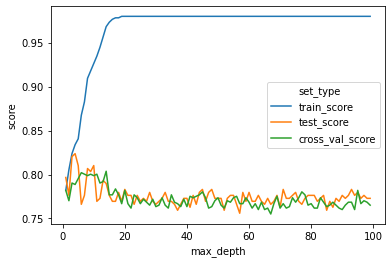

In [172]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [174]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [175]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

In [2]:
from sklearn.model_selection import GridSearchCV

In [85]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [96]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [97]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [98]:
grid_search_cv_clf.best_params_ #определяем лучшие параметры для модели из представленных в словаре parametrs

{'criterion': 'entropy', 'max_depth': 5}

In [99]:
best_clf = grid_search_cv_clf.best_estimator_

In [100]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [102]:
y_pred = best_clf.predict(X_test)

In [105]:
from sklearn.metrics import precision_score, recall_score

In [104]:
precision_score(y_test, y_pred)

0.7962962962962963

In [106]:
recall_score(y_test, y_pred)

0.7166666666666667

In [107]:
y_predicted_prob = best_clf.predict_proba(X_test)

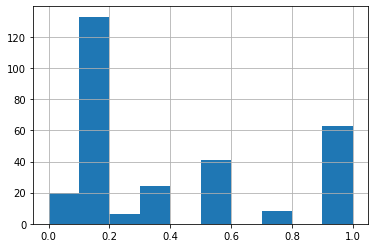

In [110]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [113]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0) #перезаписываем переменную с оптимизированным precision

In [114]:
precision_score(y_test, y_pred)

0.9206349206349206

In [115]:
from sklearn.metrics import roc_curve, auc

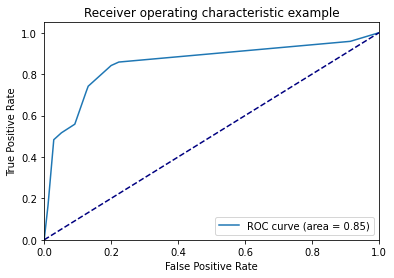

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()